In [1]:
# load necessary modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import median, mean

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
# Read the dataset as a pandas DataFrame:
olympics_df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Data/athlete_events.csv")
olympics_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [27]:
# Filter the DataFrame to contain only medal winners of the year 2016

# filter the DataFrame to contain medal winners only (for non-winners, the Medal feature is NaN)
# note use of the inplace parameter

olympics_winners = olympics_df.dropna(subset=['Medal'])

In [28]:
# Print the number of medals awarded in each sport in 2016:
# print records for each value of the feature 'Sport'
olympics_winners_2016 = olympics_winners[(olympics_winners.Year == 2016)]
olympics_winners_2016.Sport.value_counts()


Athletics                192
Swimming                 191
Rowing                   144
Football                 106
Hockey                    99
Handball                  89
Cycling                   84
Canoeing                  82
Water Polo                78
Rugby Sevens              74
Basketball                72
Volleyball                72
Wrestling                 72
Gymnastics                66
Fencing                   65
Judo                      56
Boxing                    51
Sailing                   45
Shooting                  45
Equestrianism             45
Weightlifting             45
Diving                    36
Taekwondo                 32
Synchronized Swimming     32
Badminton                 24
Tennis                    24
Table Tennis              24
Archery                   24
Rhythmic Gymnastics       18
Beach Volleyball          12
Triathlon                  6
Modern Pentathlon          6
Trampolining               6
Golf                       6
Name: Sport, d

In [29]:
# Note the top five sports based on the largest number of medals awarded in the 
# year 2016, and then create a DataFrame to include only these sports:

# list the top 5 sports
top_sports = ['Athletics', 'Swimming', 'Rowing', 'Football', 'Hockey']
# subset the DataFrame to include data from the top sports
olympics_top_sports_winners_2016 = olympics_winners_2016[(olympics_winners_2016.Sport.isin(top_sports))]
olympics_top_sports_winners_2016.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
1529,846,Valerie Kasanita Adams-Vili (-Price),F,31.0,193.0,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze


Look at the features in the dataset and note their data type – are they *categorical* or *numerical*?

The **Sport** feature, the **Team** feature, the **Medal** feature, and the **Sex** feature are all ***categorical***, while the **Age**, **Height**, and **Weight** features are ***numerical***. 
However, we should also note the range of values taken by the numerical features to get a sense of the data. This can be done using the **describe** function.

In [30]:
olympics_top_sports_winners_2016[['Age', 'Height', 'Weight']].describe()


,Age,Height,Weight
count,732.000000,729.000000,727.000000
mean,25.577869,180.023320,73.720770
std,4.451373,10.076398,14.279014
min,16.000000,150.000000,40.000000
25%,22.000000,173.000000,64.000000
50%,25.000000,180.000000,72.000000
75%,29.000000,187.000000,82.000000
max,40.000000,207.000000,136.000000


Based on the output above, we are going to visualize the **Height** and **Weight** features, depicting their global pattern:

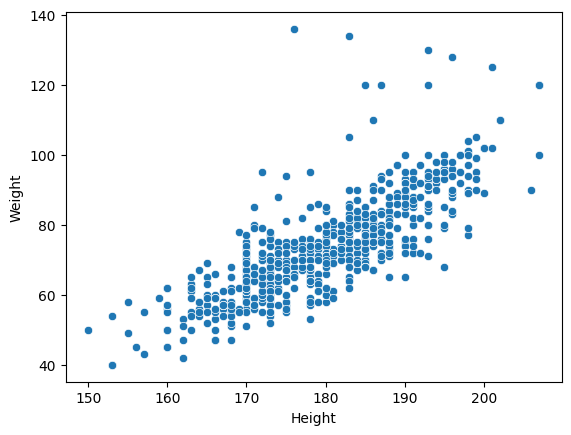

In [31]:
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax = sns.scatterplot(x="Height", y="Weight", data=olympics_top_sports_winners_2016)


It is interesting to note that there is an almost linear relationship between the **Height** and **Weight** features of the medal winners, with a few outliers. 

However, since this is a fairly dense plot with many universities in certain ranges we will draw a **hexbin plot** to represent the data.

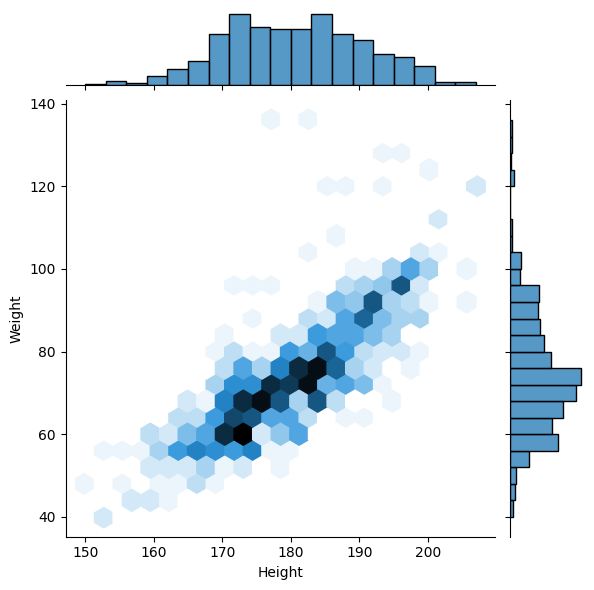

In [32]:
sns.jointplot(x="Height", y="Weight", data=olympics_top_sports_winners_2016, kind="hex")

Now let's visualize the **height** and **weight** features, depicting the medal-wise summary statistics, segregated by **athlete gender**:

<Axes: xlabel='Medal', ylabel='Weight'>

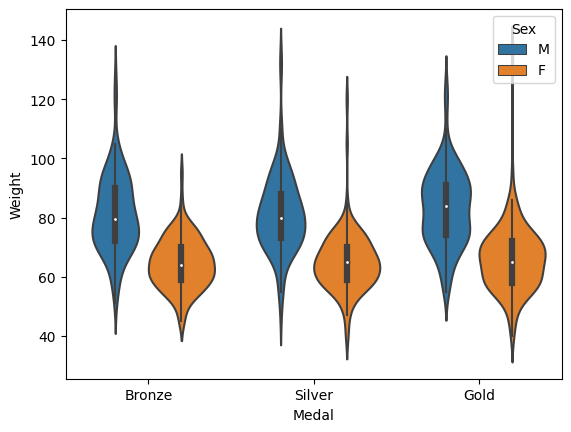

In [33]:
sns.violinplot(x='Medal', y='Weight', data=olympics_top_sports_winners_2016, hue='Sex')

Set the y axis to **Height** like so:

<Axes: xlabel='Medal', ylabel='Height'>

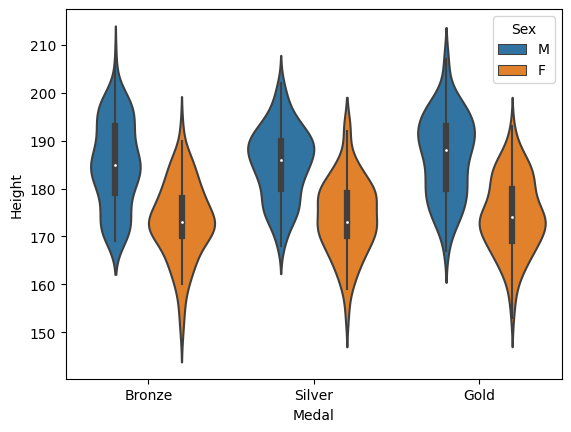

In [34]:
sns.violinplot(x='Medal', y='Height', data=olympics_top_sports_winners_2016, hue='Sex')

As expected, we see that the Height and Weight features do not differ significantly across the different medal winners. Also, Height and Weight are substantially lower for female medal winners than for male winners.

